<a href="https://colab.research.google.com/github/Mick971/Tarea_03_Grupo_01/blob/main/Amazon_Prime_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install seaborn plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon_prime_titles.csv to amazon_prime_titles.csv


In [ ]:
df = pd.read_csv("amazon_prime_titles.csv")

In [ ]:
df.head()
df.info()
df.describe(include="all")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


,0
show_id,0
type,0
title,0
director,2083
cast,1233
country,8996
date_added,9513
release_year,0
rating,337
duration,0


In [ ]:
df = df.drop_duplicates()

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"])

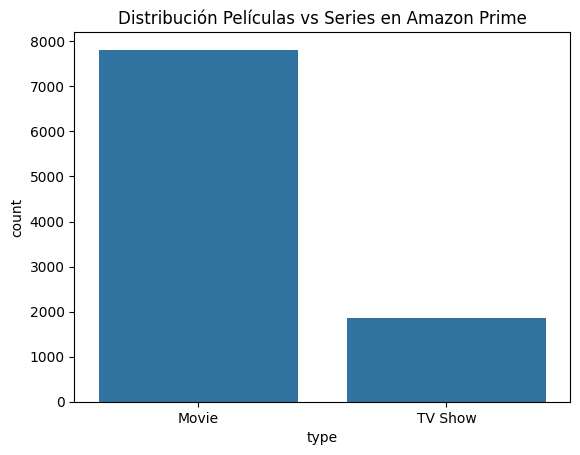

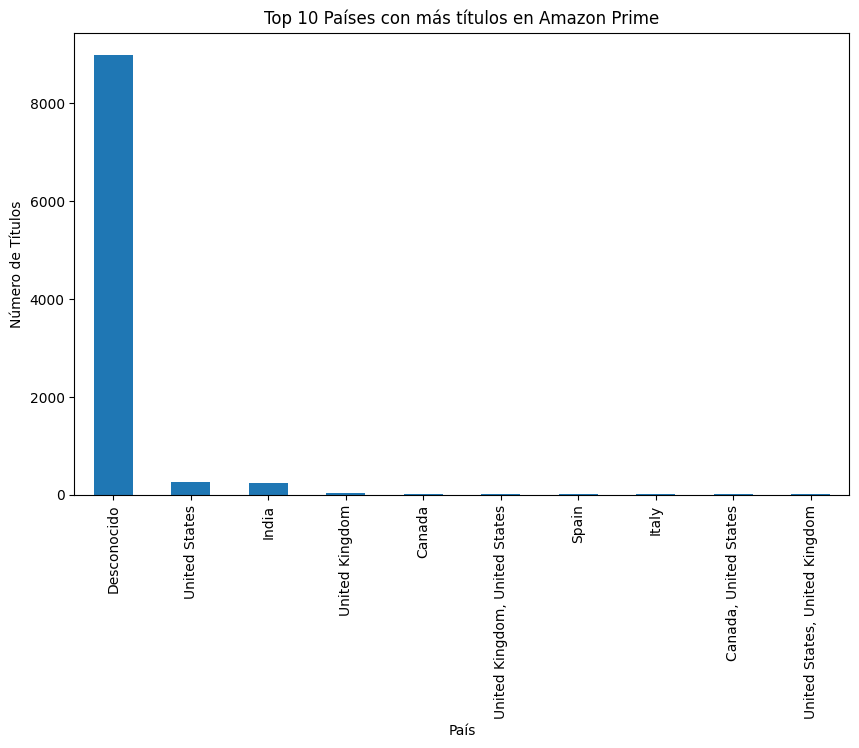

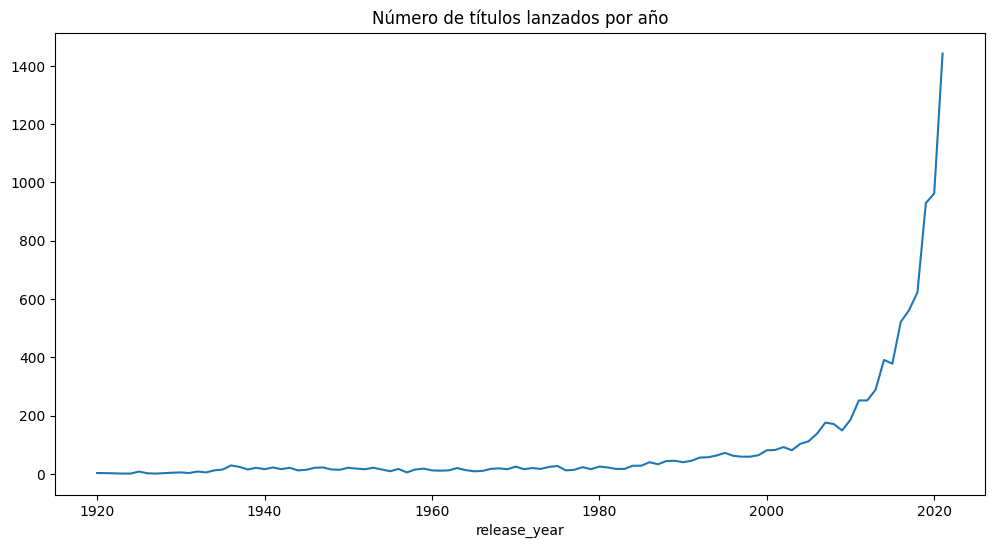

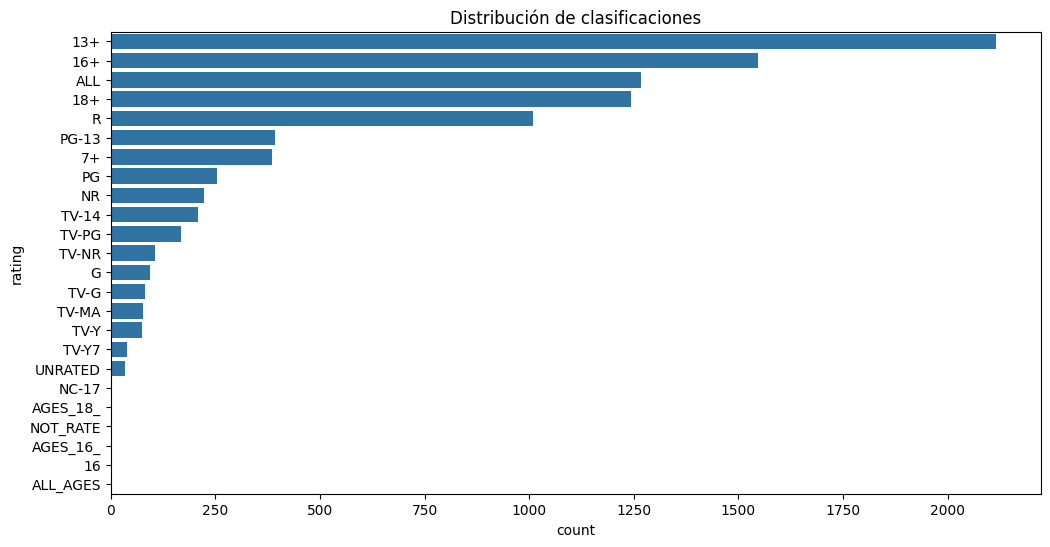

✅ Mayor contenido en Amazon Prime son series de TV.
✅ El país con más títulos es Estados Unidos, seguido por India.
✅ La clasificación más común es TV-MA.
✅ A partir de 2015, se incrementó fuertemente el número de títulos.


In [ ]:
df["country"] = df["country"].fillna("Desconocido")

df["title"] = df["title"].str.strip().str.title()


sns.countplot(x="type", data=df)
plt.title("Distribución Películas vs Series en Amazon Prime")
plt.show()

# Top 10 países
top_countries = df["country"].value_counts().head(10)
top_countries.plot(kind="bar", figsize=(10,6))
plt.title("Top 10 Países con más títulos en Amazon Prime")
plt.xlabel("País")
plt.ylabel("Número de Títulos")
plt.show()

# Títulos por año de lanzamiento
df["release_year"].value_counts().sort_index().plot(kind="line", figsize=(12,6))
plt.title("Número de títulos lanzados por año")
plt.show()

# Distribución de ratings
plt.figure(figsize=(12,6))
sns.countplot(y="rating", data=df, order=df["rating"].value_counts().index)
plt.title("Distribución de clasificaciones")
plt.show()

# ===============================
# 7. Visualización interactiva con Plotly
# ===============================
fig = px.histogram(df, x="release_year", color="type", nbins=50,
                   title="Películas y Series por Año")
fig.show()


print("✅ Mayor contenido en Amazon Prime son series de TV.")
print("✅ El país con más títulos es Estados Unidos, seguido por India.")
print("✅ La clasificación más común es TV-MA.")
print("✅ A partir de 2015, se incrementó fuertemente el número de títulos.")